# **NYC Parking Ticket Analysis Using 3 Different Libraries.**

**Group Members:**

<table>
  <tr>
    <th>Name</th>
    <th>Matric</th>
  </tr>
  <tr>
    <th>LEE MING QI</th>
    <th>A20EC0064</th>
  </tr>

  <tr>
    <th>AMIRAH RAIHANAH BINTI ABDUL RAHIM</th>
    <th>A20EC0182</th>
  </tr>
    <tr>
    <th>SINGTHAI SRISOI</th>
    <th>A20EC0147</th>
  </tr>
    <tr>
    <th>NUR IRDINA ALIAH BINTI ABDUL WAHAB</th>
    <th>A20EC0115</th>
  </tr>
</table>


**About Project:**

In this project, we will analyze NYC Parking Ticket dataset by performing EDA using 3 different libraries. The libraries that will be use are Dask, Pyspark and Koalas.The dataset used can be retrieve from [Kaggle](https://www.kaggle.com/datasets/new-york-city/nyc-parking-tickets). This is a large dataset that contains 10 million rows and 51 columns with the size of 2GB. We will show each operation by using the 3 libraries stated and provide time taken needed to perform it. This will help you to evaluate which library can do it more effectively. 
This project is divided to 4 parts;


1.   Downloading Dataset
2.   Data Cleaning
3.   Data Visualization
4.   Data Questions and Answers
5.   Findings and Analysis






---


## **`Downloading the Dataset`**

The NYC Department of Finance collects data on every parking ticket issued in NYC. This data is made publicly available to aid in ticket resolution and to guide policymakers. Now, we will perform EDA by first downloading the dataset from Kaggle [here](https://www.kaggle.com/datasets/new-york-city/nyc-parking-tickets).

Download steps:
1. Open [dataset link](https://www.kaggle.com/datasets/new-york-city/nyc-parking-tickets) that will be directed to the NYC Parking Ticket dataset.
2. Download the dataset.
3. Upload dataset into Google Drive.
4. Get link of the dataset file in Google Drive.
5. Import the dataset retrieve from Google Drive.

In [ ]:
# Pull dataset from google drive
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
link = 'https://drive.google.com/file/d/1TSEOGseOzszVn342YESVHk7LyjX1Qmbd/view?usp=sharing'
# to get the id part of the file
id = link.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('NYC_Parking_Ticket.csv') 



---

# **`Read Dataset Into Dataframe Of Each Library`**
Steps:
1. Install library using pip.
2. Import the library installed.
3. Read the csv file into dataframe.

In [ ]:
import pandas as pd
import numpy as np

**1. Dask**

In [ ]:
!python -m pip install "dask[complete]" # Install everything

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
 #specify dtypes to prevent errors because the dataset is messy.
 dtypes={'Date First Observed': str,
    'Days Parking In Effect    ': str,
    'Double Parking Violation': str,
    'Feet From Curb': np.float32,
    'From Hours In Effect': str,
    'House Number': str,
    'Hydrant Violation': str,
    'Intersecting Street': str,
    'Issue Date': str,
    'Issuer Code': np.float32,
    'Issuer Command': str,
    'Issuer Precinct': np.float32,
    'Issuer Squad': str,
    'Issuing Agency': str,
    'Law Section': np.float32,
    'Meter Number': str,
    'No Standing or Stopping Violation': str,
    'Plate ID': str,
    'Plate Type': str,
    'Registration State': str,
    'Street Code1': np.int32,
    'Street Code2': np.int32,
    'Street Code3': np.int32,
    'Street Name': str,
    'Sub Division': str,
    'Summons Number': np.int32,
    'Time First Observed': str,
    'To Hours In Effect': str,
    'Unregistered Vehicle?': str,
    'Vehicle Body Type': str,
    'Vehicle Color': str,
    'Vehicle Expiration Date': str,
    'Vehicle Make': str,
    'Vehicle Year': np.float32,
    'Violation Code': np.int16,
    'Violation County': str,
    'Violation Description': str,
    'Violation In Front Of Or Opposite': str,
    'Violation Legal Code': str,
    'Violation Location': str,
    'Violation Post Code': str,
    'Violation Precinct': np.float32,
    'Violation Time': str
}

In [ ]:
import dask.dataframe as dd

In [ ]:
%%time
dfdask = dd.read_csv('NYC_Parking_Ticket.csv',dtype=dtypes)
dfdask.head()
       

CPU times: user 1.02 s, sys: 166 ms, total: 1.18 s
Wall time: 1.33 s


,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Hydrant Violation,Double Parking Violation,Latitude,Longitude,Community Board,Community Council,Census Tract,BIN,BBL,NTA
0,1283294138,GBB9093,NY,PAS,08/04/2013,46,SUBN,AUDI,P,37250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1283294151,62416MB,NY,COM,08/04/2013,46,VAN,FORD,P,37290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1283294163,78755JZ,NY,COM,08/05/2013,46,P-U,CHEVR,P,37030,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1283294175,63009MA,NY,COM,08/05/2013,46,VAN,FORD,P,37270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1283294187,91648MC,NY,COM,08/08/2013,41,TRLR,GMC,P,37240,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**2. PySpark**

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as func
from pyspark.sql.types import StructType,StructField, StringType, IntegerType 
from pyspark.sql.types import ArrayType, DoubleType, BooleanType
from pyspark.sql.functions import col,array_contains
spark = SparkSession.builder.getOrCreate()

In [ ]:
%%time
dfs = spark.read.options(header = "true", \
  inferSchema = "true",) \
     .csv("NYC_Parking_Ticket.csv")
dfs.show(5)

+--------------+--------+------------------+----------+----------+--------------+-----------------+------------+--------------+------------+------------+------------+-----------------------+------------------+------------------+---------------+-----------+--------------+------------+--------------+-------------------+----------------+---------------------------------+------------+-----------+-------------------+-------------------+-----------+------------+--------------------+--------------------------+--------------------+------------------+-------------+---------------------+------------+------------+--------------+-------------------+---------------------+---------------------------------+-----------------+------------------------+--------+---------+---------------+------------------+------------+----+----+----+
|Summons Number|Plate ID|Registration State|Plate Type|Issue Date|Violation Code|Vehicle Body Type|Vehicle Make|Issuing Agency|Street Code1|Street Code2|Street Code3|Vehicle

**3. Koalas**

In [ ]:
!pip install koalas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import databricks.koalas as ks

In [ ]:
%%time
dfk = ks.read_csv('NYC_Parking_Ticket.csv',dtype=dtypes)
dfk.head()

CPU times: user 3.72 s, sys: 649 ms, total: 4.37 s
Wall time: 58.4 s


,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,Street Code2,Street Code3,Vehicle Expiration Date,Violation Location,Violation Precinct,Issuer Precinct,Issuer Code,Issuer Command,Issuer Squad,Violation Time,Time First Observed,Violation County,Violation In Front Of Or Opposite,House Number,Street Name,Intersecting Street,Date First Observed,Law Section,Sub Division,Violation Legal Code,Days Parking In Effect,From Hours In Effect,To Hours In Effect,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation,Latitude,Longitude,Community Board,Community Council,Census Tract,BIN,BBL,NTA
0,1283294138,GBB9093,NY,PAS,08/04/2013,46,SUBN,AUDI,P,37250,13610,21190,20140831,33,33.0,33.0,921043.0,0033,0000,0752A,None,None,F,712,W 175 ST,None,0,408.0,F1,None,BBBBBBB,ALL,ALL,GY,0,2013.0,-,0.0,None,None,None,None,None,None,None,None,None,None,None,None,None
1,1283294151,62416MB,NY,COM,08/04/2013,46,VAN,FORD,P,37290,40404,40404,20140430,33,33.0,33.0,921043.0,0033,0000,1240P,None,NY,O,201,W 177 ST,None,0,408.0,C,None,BBBBBBB,ALL,ALL,WH,0,2012.0,-,0.0,None,None,None,None,None,None,None,None,None,None,None,None,None
2,1283294163,78755JZ,NY,COM,08/05/2013,46,P-U,CHEVR,P,37030,31190,13610,20140228,33,33.0,33.0,921043.0,0033,0000,1243P,None,NY,O,520,W 163 ST,None,0,408.0,F7,None,BBBBBBB,ALL,ALL,None,0,0.0,-,0.0,None,None,None,None,None,None,None,None,None,None,None,None,None
3,1283294175,63009MA,NY,COM,08/05/2013,46,VAN,FORD,P,37270,11710,12010,20141031,33,33.0,33.0,921043.0,0033,0000,0232P,None,NY,O,517,W 176 ST,None,0,408.0,F1,None,BBBBBBB,ALL,ALL,WH,0,2010.0,-,0.0,None,None,None,None,None,None,None,None,None,None,None,None,None
4,1283294187,91648MC,NY,COM,08/08/2013,41,TRLR,GMC,P,37240,12010,31190,0,33,33.0,33.0,921043.0,0033,0000,1239P,None,NY,F,590,W 174 ST,None,0,408.0,E1,None,BBBBBBB,ALL,ALL,BR,0,2012.0,-,0.0,None,None,None,None,None,None,None,None,None,None,None,None,None


>**Findings ▶** 
All library has different way of importing the dataset and requires different functions to run it.
>1. Dask 🕔
Dask is the fastest way to read the data by taking **1.33s** but we have to initialize its dtype. This is because there are a lot of mismatched data type in the dataset. It requires to import **dask.dataframe** in order to read it in dataframe. The function used is common like Pandas which is **read.csv()**.

>2. PySpark 🕔
Pyspark took a long time to read the dataset which is **53.2s**. In pyspark, there is no need to initialize dtype because we can set **inferSchema = True** and it will assign the correct dtype. The function used is different from common Pandas which is **spark.read.options.**

>3. Koalas 🕔
Koalas took the **longest time** compared to Dask and PySpark which is **58.4s**.
Most of Koalas funtions are the same with common Pandas which in this case we use **read.csv()** to read the data into dataframe.




---



---



# **`Data Preparation and Cleaning`**

The dataset contains 10 million rows and 51 columns of records which has a lot of missing data, mismatched data, unused columns and other mess that need to be clean. Before we can analyze the data, we must clean the data to obtain an accurate analysis. Now, we will perform data cleaning using 3 different libraries and evaluate which library does it more effectively.

# **`Step 1: Checking dataframe size to ensure all libraries read the same number of records.`**

**1. Dask**

In [ ]:
%%time
dfdask.shape

CPU times: user 6.11 ms, sys: 0 ns, total: 6.11 ms
Wall time: 6.16 ms


(Delayed('int-beb222a0-3911-4f66-b1c1-e7f70f2151c4'), 51)

**2. PySpark**

In [ ]:
%%time
rows = dfs.count()
cols = len(dfs.columns)
print (rows, "," ,cols)


9100278 , 51
CPU times: user 37.7 ms, sys: 5.78 ms, total: 43.5 ms
Wall time: 4.58 s


**3. Koalas**

In [ ]:
%%time
dfk.shape

CPU times: user 63.9 ms, sys: 7.57 ms, total: 71.5 ms
Wall time: 6.9 s


(9100278, 51)

>**Findings ▶** 
All libraries managed to read the same no of rows and columns which are **9100278 rows and 51 columns**. To find the number and columns read by all libraries, **Dask and Koalas** use the same method which is **dataframe.shape**. Meanwhile, **Pyspark** is different and it **uses count to find rows and cols for columns**.

>1. Dask 🕔
Dask is the fastest way to find number of rows and columns by taking **6.11ms**.

>2. PySpark 🕔
PySpark comes next as it took **4.58s**  to find number of rows and columns.

>3. Koalas 🕔
Koalas took the **longest time** compared to Dask and PySpark which is **6.9s**.




---



---



# **`Step 2: Check and drop column that has more than 80% missing values.`**



This dataset contains a lot of missing and null values and certain columns have no values at all. Anyhow, dropping all missing values is not recommended as it will lose a lot of records. Some null values can be change to 0, for example column `Feet From Curb` because the attribute may not be collected but the parking ticket is still valid.In order to get a clean data, we must drop the columns and change the null values to get consistent result for our analysis.

Steps:
1. Check number of Nan values.
2. Drop columns that have more than 80% Nan values.
3. Fill in the rest of Nan values with 0.
4. Check if there is any Nan values left.

**1. Dask**

In [ ]:
%%time
dfdask.isnull().sum().compute()


CPU times: user 51.1 s, sys: 2.72 s, total: 53.8 s
Wall time: 52.3 s


Summons Number                             0
Plate ID                                3612
Registration State                         0
Plate Type                                 0
Issue Date                                 0
Violation Code                             0
Vehicle Body Type                     111377
Vehicle Make                           63273
Issuing Agency                             0
Street Code1                               0
Street Code2                               0
Street Code3                               0
Vehicle Expiration Date                    0
Violation Location                    671170
Violation Precinct                         0
Issuer Precinct                            0
Issuer Code                                0
Issuer Command                        654437
Issuer Squad                          654437
Violation Time                          2074
Time First Observed                  8080301
Violation County                      705205
Violation 

In [ ]:
%%time
dfdask=dfdask.drop(['Time First Observed','Violation Legal Code','Unregistered Vehicle?','No Standing or Stopping Violation', 'Hydrant Violation', 'Double Parking Violation','Latitude','Longitude','Community Board','Community Council ','Census Tract','BIN','BBL','NTA'], axis=1) 
dfdask.head()


CPU times: user 924 ms, sys: 20.5 ms, total: 945 ms
Wall time: 951 ms


,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Sub Division,Days Parking In Effect,From Hours In Effect,To Hours In Effect,Vehicle Color,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description
0,1283294138,GBB9093,NY,PAS,08/04/2013,46,SUBN,AUDI,P,37250,...,F1,BBBBBBB,ALL,ALL,GY,2013.0,-,0.0,NaN,NaN
1,1283294151,62416MB,NY,COM,08/04/2013,46,VAN,FORD,P,37290,...,C,BBBBBBB,ALL,ALL,WH,2012.0,-,0.0,NaN,NaN
2,1283294163,78755JZ,NY,COM,08/05/2013,46,P-U,CHEVR,P,37030,...,F7,BBBBBBB,ALL,ALL,NaN,0.0,-,0.0,NaN,NaN
3,1283294175,63009MA,NY,COM,08/05/2013,46,VAN,FORD,P,37270,...,F1,BBBBBBB,ALL,ALL,WH,2010.0,-,0.0,NaN,NaN
4,1283294187,91648MC,NY,COM,08/08/2013,41,TRLR,GMC,P,37240,...,E1,BBBBBBB,ALL,ALL,BR,2012.0,-,0.0,NaN,NaN


In [ ]:
#Not all nan values need to be drop. Hence we fill the Nan values with 0.
%%time
dfdask = dfdask.fillna(0)


CPU times: user 8.31 ms, sys: 0 ns, total: 8.31 ms
Wall time: 7.97 ms


In [ ]:
dfdask.isnull().sum().compute()

Summons Number                       0
Plate ID                             0
Registration State                   0
Plate Type                           0
Issue Date                           0
Violation Code                       0
Vehicle Body Type                    0
Vehicle Make                         0
Issuing Agency                       0
Street Code1                         0
Street Code2                         0
Street Code3                         0
Vehicle Expiration Date              0
Violation Location                   0
Violation Precinct                   0
Issuer Precinct                      0
Issuer Code                          0
Issuer Command                       0
Issuer Squad                         0
Violation Time                       0
Violation County                     0
Violation In Front Of Or Opposite    0
House Number                         0
Street Name                          0
Intersecting Street                  0
Date First Observed      

**2.PySpark**

In [ ]:
%%time
from pyspark.sql.functions import isnan, when, count, col
dfs.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in dfs.columns]).show()

+--------------+--------+------------------+----------+----------+--------------+-----------------+------------+--------------+------------+------------+------------+-----------------------+------------------+------------------+---------------+-----------+--------------+------------+--------------+-------------------+----------------+---------------------------------+------------+-----------+-------------------+-------------------+-----------+------------+--------------------+--------------------------+--------------------+------------------+-------------+---------------------+------------+------------+--------------+-------------------+---------------------+---------------------------------+-----------------+------------------------+--------+---------+---------------+------------------+------------+-------+-------+-------+
|Summons Number|Plate ID|Registration State|Plate Type|Issue Date|Violation Code|Vehicle Body Type|Vehicle Make|Issuing Agency|Street Code1|Street Code2|Street Code

In [ ]:
%%time
dfs.drop('Time First Observed','Violation Legal Code','Unregistered Vehicle?','No Standing or Stopping Violation', 'Hydrant Violation', 'Double Parking Violation','Latitude','Longitude','Community Board','Community Council ','Census Tract','BIN','BBL','NTA') \
    .printSchema()

root
 |-- Summons Number: long (nullable = true)
 |-- Plate ID: string (nullable = true)
 |-- Registration State: string (nullable = true)
 |-- Plate Type: string (nullable = true)
 |-- Issue Date: string (nullable = true)
 |-- Violation Code: integer (nullable = true)
 |-- Vehicle Body Type: string (nullable = true)
 |-- Vehicle Make: string (nullable = true)
 |-- Issuing Agency: string (nullable = true)
 |-- Street Code1: integer (nullable = true)
 |-- Street Code2: integer (nullable = true)
 |-- Street Code3: integer (nullable = true)
 |-- Vehicle Expiration Date: integer (nullable = true)
 |-- Violation Location: integer (nullable = true)
 |-- Violation Precinct: integer (nullable = true)
 |-- Issuer Precinct: integer (nullable = true)
 |-- Issuer Code: integer (nullable = true)
 |-- Issuer Command: string (nullable = true)
 |-- Issuer Squad: string (nullable = true)
 |-- Violation Time: string (nullable = true)
 |-- Violation County: string (nullable = true)
 |-- Violation In Fron

In [ ]:
#Not all nan values need to be drop. Hence we fill the Nan values with 0.
%%time
dfs=dfs.fillna(0)

CPU times: user 1.3 ms, sys: 995 µs, total: 2.3 ms
Wall time: 43 ms


In [ ]:
%%time
from pyspark.sql.functions import isnan, when, count, col
dfs.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in dfs.columns]).show()

+--------------+--------+------------------+----------+----------+--------------+-----------------+------------+--------------+------------+------------+------------+-----------------------+------------------+------------------+---------------+-----------+--------------+------------+--------------+-------------------+----------------+---------------------------------+------------+-----------+-------------------+-------------------+-----------+------------+--------------------+--------------------------+--------------------+------------------+-------------+---------------------+------------+------------+--------------+-------------------+---------------------+---------------------------------+-----------------+------------------------+--------+---------+---------------+------------------+------------+-------+-------+-------+
|Summons Number|Plate ID|Registration State|Plate Type|Issue Date|Violation Code|Vehicle Body Type|Vehicle Make|Issuing Agency|Street Code1|Street Code2|Street Code

**3.Koalas**

In [ ]:
%%time
dfk.isnull().sum()

CPU times: user 1.01 s, sys: 127 ms, total: 1.14 s
Wall time: 46.7 s


Summons Number                             0
Plate ID                                   0
Registration State                         0
Plate Type                                 0
Issue Date                                 0
Violation Code                             0
Vehicle Body Type                          0
Vehicle Make                               0
Issuing Agency                             0
Street Code1                               0
Street Code2                               0
Street Code3                               0
Vehicle Expiration Date                    0
Violation Location                         0
Violation Precinct                         0
Issuer Precinct                            0
Issuer Code                                0
Issuer Command                             0
Issuer Squad                               0
Violation Time                             0
Time First Observed                        0
Violation County                           0
Violation 

In [ ]:
%%time
dfk=dfk.drop(['Time First Observed','Violation Legal Code','Unregistered Vehicle?','No Standing or Stopping Violation', 'Hydrant Violation', 'Double Parking Violation','Latitude','Longitude','Community Board','Community Council ','Census Tract','BIN','BBL','NTA'], axis=1) 
dfk.head()

CPU times: user 44 ms, sys: 974 µs, total: 45 ms
Wall time: 141 ms


,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,Street Code2,Street Code3,Vehicle Expiration Date,Violation Location,Violation Precinct,Issuer Precinct,Issuer Code,Issuer Command,Issuer Squad,Violation Time,Violation County,Violation In Front Of Or Opposite,House Number,Street Name,Intersecting Street,Date First Observed,Law Section,Sub Division,Days Parking In Effect,From Hours In Effect,To Hours In Effect,Vehicle Color,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description
0,1283294138,GBB9093,NY,PAS,08/04/2013,46,SUBN,AUDI,P,37250,13610,21190,20140831,33,33.0,33.0,921043.0,0033,0000,0752A,None,F,712,W 175 ST,None,0,408.0,F1,BBBBBBB,ALL,ALL,GY,2013.0,-,0.0,None,None
1,1283294151,62416MB,NY,COM,08/04/2013,46,VAN,FORD,P,37290,40404,40404,20140430,33,33.0,33.0,921043.0,0033,0000,1240P,NY,O,201,W 177 ST,None,0,408.0,C,BBBBBBB,ALL,ALL,WH,2012.0,-,0.0,None,None
2,1283294163,78755JZ,NY,COM,08/05/2013,46,P-U,CHEVR,P,37030,31190,13610,20140228,33,33.0,33.0,921043.0,0033,0000,1243P,NY,O,520,W 163 ST,None,0,408.0,F7,BBBBBBB,ALL,ALL,None,0.0,-,0.0,None,None
3,1283294175,63009MA,NY,COM,08/05/2013,46,VAN,FORD,P,37270,11710,12010,20141031,33,33.0,33.0,921043.0,0033,0000,0232P,NY,O,517,W 176 ST,None,0,408.0,F1,BBBBBBB,ALL,ALL,WH,2010.0,-,0.0,None,None
4,1283294187,91648MC,NY,COM,08/08/2013,41,TRLR,GMC,P,37240,12010,31190,0,33,33.0,33.0,921043.0,0033,0000,1239P,NY,F,590,W 174 ST,None,0,408.0,E1,BBBBBBB,ALL,ALL,BR,2012.0,-,0.0,None,None


In [ ]:
#Not all nan values need to be drop. Hence we fill the Nan values with 0.
%%time
dfk = dfk.fillna(0)

CPU times: user 330 ms, sys: 41.6 ms, total: 372 ms
Wall time: 1.75 s


In [ ]:
#dfk.isnull().sum()

>**Findings ▶** 
There are some similarity in all 3 libraries in finding and drop missing values. Dask and Koalas uses the same method but PySpark using different method.
We found that the fastest library that can do this operation is **Koalas** with the total of **48.5s**.
>1. Dask 🕔
Dask took **52.3s** to compute nan values **0.951s** to drop columns and **7.97ms** to fill null values. Total execution time is **53.2s**, the 2nd fastest library.

>2. PySpark 🕔
PySpark took **5min 32s** to compute nan values **13.2ms** to drop columns and **43ms** to fill null values. Total execution time is **5min 32s** which is about **6 times slower compared to Dask**.

>3. Koalas 🕔
Koalas took **46.7s** to compute nan values **45ms** to drop columns and **1.75s** to fill null values. Total execution time is **48.5s** which is **5s in front of Dask**.





---



---



# **`Step 3: Convert column 'Issue Date' to datetime.`**

The ` Issue Date`column has string type data hence it need to be change to datetime type.

**1. Dask**

In [ ]:
%%time
dfdask['Issue Date'] = dd.to_datetime(dfdask['Issue Date'],format='%m/%d/%Y',errors='coerce')
dfdask.dtypes

CPU times: user 10 ms, sys: 1.01 ms, total: 11 ms
Wall time: 23.3 ms


Summons Number                                int32
Plate ID                                     object
Registration State                           object
Plate Type                                   object
Issue Date                           datetime64[ns]
Violation Code                                int16
Vehicle Body Type                            object
Vehicle Make                                 object
Issuing Agency                               object
Street Code1                                  int32
Street Code2                                  int32
Street Code3                                  int32
Vehicle Expiration Date                      object
Violation Location                           object
Violation Precinct                          float32
Issuer Precinct                             float32
Issuer Code                                 float32
Issuer Command                               object
Issuer Squad                                 object
Violation Ti

**2. PySpark**

In [ ]:
%%time
#dfs = dfs.withColumn("Issue Date", to_date(dfs.date_string))
#from pyspark.sql.functions import to_date, lit
#df.select("db_id", to_date(lit("1-12-2022"),"d-MM-yyyy")).show()
from pyspark.sql.types import StringType, DateType, FloatType
dfs = dfs.withColumn('Issue Date', func.to_date('Issue Date', 'dd/MM/yyyy'))
dfs.printSchema()


root
 |-- Summons Number: long (nullable = true)
 |-- Plate ID: string (nullable = true)
 |-- Registration State: string (nullable = true)
 |-- Plate Type: string (nullable = true)
 |-- Issue Date: date (nullable = true)
 |-- Violation Code: integer (nullable = true)
 |-- Vehicle Body Type: string (nullable = true)
 |-- Vehicle Make: string (nullable = true)
 |-- Issuing Agency: string (nullable = true)
 |-- Street Code1: integer (nullable = true)
 |-- Street Code2: integer (nullable = true)
 |-- Street Code3: integer (nullable = true)
 |-- Vehicle Expiration Date: integer (nullable = true)
 |-- Violation Location: integer (nullable = true)
 |-- Violation Precinct: integer (nullable = true)
 |-- Issuer Precinct: integer (nullable = true)
 |-- Issuer Code: integer (nullable = true)
 |-- Issuer Command: string (nullable = true)
 |-- Issuer Squad: string (nullable = true)
 |-- Violation Time: string (nullable = true)
 |-- Time First Observed: string (nullable = true)
 |-- Violation County

**3. Koalas**

In [ ]:
%%time
dfk['Issue Date'] = ks.to_datetime(dfk['Issue Date'],format='%m/%d/%Y',errors='coerce')
dfk.dtypes

/usr/local/lib/python3.8/dist-packages/pyspark/sql/pandas/functions.py:394: UserWarning: In Python 3.6+ and Spark 3.0+, it is preferred to specify type hints for pandas UDF instead of specifying pandas UDF type which will be deprecated in the future releases. See SPARK-28264 for more details.
  warnings.warn(


CPU times: user 143 ms, sys: 19.3 ms, total: 162 ms
Wall time: 871 ms


Summons Number                            int32
Plate ID                                 object
Registration State                       object
Plate Type                               object
Issue Date                           datetime64
Violation Code                            int32
Vehicle Body Type                        object
Vehicle Make                             object
Issuing Agency                           object
Street Code1                              int32
Street Code2                              int32
Street Code3                              int32
Vehicle Expiration Date                  object
Violation Location                       object
Violation Precinct                      float32
Issuer Precinct                         float32
Issuer Code                             float32
Issuer Command                           object
Issuer Squad                             object
Violation Time                           object
Violation County                        

>**Findings ▶** 
To change dtype of a column Dask and Koalas use the same method which is **to_datetime()**. Meanwhile, PySpark need to use import function **to_date()**.
We found that the **fastest library** is **PySpark** and **Dask** that took **23.3ms**.
>1. Dask 🕔
Dask took **23.3ms** to change dtype from string to datetime.

>2. PySpark 🕔
PySpark is the **same** compared to Dask with only **23.3ms** to change dtype string to date.

>3. Koalas 🕔
Koalas remain as the **slowest library** that took **871ms** to change dtype string to datetime.





---



---



## **`Step 4: Drop Duplicates of Unique Values`**

In NYC Parking Ticket dataset, the `Summons Number` is a unique value because there can only be 1 record of each summon took. In the dataset, w

**1. Dask**

In [ ]:
%%time
dfdask.drop_duplicates(subset = ['Summons Number'], inplace = True)
dfdask.head()


CPU times: user 1.53 s, sys: 48.9 ms, total: 1.58 s
Wall time: 1.6 s


,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Sub Division,Days Parking In Effect,From Hours In Effect,To Hours In Effect,Vehicle Color,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description
0,1283294138,GBB9093,NY,PAS,2013-08-04,46,SUBN,AUDI,P,37250,...,F1,BBBBBBB,ALL,ALL,GY,2013.0,-,0.0,0,0
1,1283294151,62416MB,NY,COM,2013-08-04,46,VAN,FORD,P,37290,...,C,BBBBBBB,ALL,ALL,WH,2012.0,-,0.0,0,0
2,1283294163,78755JZ,NY,COM,2013-08-05,46,P-U,CHEVR,P,37030,...,F7,BBBBBBB,ALL,ALL,0,0.0,-,0.0,0,0
3,1283294175,63009MA,NY,COM,2013-08-05,46,VAN,FORD,P,37270,...,F1,BBBBBBB,ALL,ALL,WH,2010.0,-,0.0,0,0
4,1283294187,91648MC,NY,COM,2013-08-08,41,TRLR,GMC,P,37240,...,E1,BBBBBBB,ALL,ALL,BR,2012.0,-,0.0,0,0


**2. PySpark**

In [ ]:
#dfs.drop_duplicates(subset = ['Summons Number'], inplace = True)
%%time
dfs.dropDuplicates(['Summons Number'])
dfs.show(5)

+--------------+--------+------------------+----------+----------+--------------+-----------------+------------+--------------+------------+------------+------------+-----------------------+------------------+------------------+---------------+-----------+--------------+------------+--------------+-------------------+----------------+---------------------------------+------------+-----------+-------------------+-------------------+-----------+------------+--------------------+--------------------------+--------------------+------------------+-------------+---------------------+------------+------------+--------------+-------------------+---------------------+---------------------------------+-----------------+------------------------+--------+---------+---------------+------------------+------------+----+----+----+
|Summons Number|Plate ID|Registration State|Plate Type|Issue Date|Violation Code|Vehicle Body Type|Vehicle Make|Issuing Agency|Street Code1|Street Code2|Street Code3|Vehicle

**3. Koalas**

In [ ]:
%%time
dfk.drop_duplicates(subset = ['Summons Number'], inplace = True)
dfk.head()


CPU times: user 222 ms, sys: 34.7 ms, total: 256 ms
Wall time: 1.44 s


,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,Street Code2,Street Code3,Vehicle Expiration Date,Violation Location,Violation Precinct,Issuer Precinct,Issuer Code,Issuer Command,Issuer Squad,Violation Time,Violation County,Violation In Front Of Or Opposite,House Number,Street Name,Intersecting Street,Date First Observed,Law Section,Sub Division,Days Parking In Effect,From Hours In Effect,To Hours In Effect,Vehicle Color,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description
84217,-1589820192,611YJS,CT,PAS,2013-07-29,38,4DSD,HONDA,T,54580,0,0,20130088,109,109.0,109.0,355249.0,T401,P,0240P,Q,I,E,Main St,29ft N/of Peck Ave,0,408.0,h1,Y,0900A,0700P,GREY,0.0,None,0.0,03 -,38-Failure to Display Muni Rec
84222,-1589820090,7AM9586,MD,PAS,2013-07-30,38,SUBN,HONDA,T,0,40404,40404,20131188,109,109.0,109.0,356334.0,T401,M,0615A,Q,I,None,Flushing Lot #1,None,0,408.0,h1,Y,0600A,1000P,GREY,0.0,None,0.0,A -,38-Failure to Display Muni Rec
502091,-1589819695,24490MD,NY,COM,2013-07-30,51,VAN,ISUZU,T,8140,8990,9140,20150228,114,114.0,114.0,356329.0,T401,O,0333P,Q,O,38-06,31st St,None,0,408.0,e3,None,None,None,WH,2001.0,None,0.0,D -,51-Sidewalk
502054,-1589819475,FHV4577,NY,PAS,2013-07-31,74,SUBN,NISSA,T,18240,8190,57790,20150316,115,115.0,115.0,357084.0,T401,E,1014A,Q,F,32-45,90th St,None,0,408.0,j2,None,None,None,BL,2008.0,None,0.0,16 -,74-Missing Display Plate
502133,-1589819025,FXX6070,NY,PAS,2013-08-01,20,SUBN,GMC,T,14740,58190,45490,20140515,104,104.0,104.0,357054.0,T401,K,1123A,Q,O,58-11,70th Ave,None,0,408.0,d,Y,0800A,0600P,GY,2003.0,None,0.0,62-A,20A-No Parking (Non-COM)


Findings ▶

In order to remove or drop duplicate values Dask and Koalas use the same method which is dataframe.drop_duplicates() while PySpark uses dataframe.dropDuplicates(). For this operation, PySpark is the fastest library which took 189ms.

Dask 🕔
Dask took 1.6s to remove the duplicates value of Summons Number and is the slowest library.

PySpark 🕔
PySpark is the fastest compared to Dask and Koalas with only 189ms to remove duplicate values of Summons Number .

Koalas 🕔
Koalas remain as the 2nd slowest library that took 1.44s to remove duplicate values of Summons Number .

# **Visualization**



**PySpark**

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def pieplot(dfs, col, lim=10, yname=None):
    
    '''
    This function makes a pie chart for the Spark dataframe df 
    for categorical column col only selecting top categories 
    as specified by lim. 
    '''
    
    # Grouping by the categories, counting on each categories 
    # and ordering them by the count
    classes = dfs.groupBy(col).count().orderBy('count', ascending=False)
    
    # Take first 'lim' number of rows and convert to pandas  
    pd_df = classes.limit(lim).toPandas()
    
    # Making plot 
    pd_df.plot(kind='pie', x=col, y='count', \
           labels=pd_df[col], legend=False)
    plt.ylabel(None)
    plt.show()

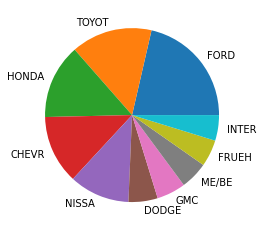

CPU times: user 252 ms, sys: 18.4 ms, total: 270 ms
Wall time: 24.1 s


In [ ]:
%%time
pieplot(dfs, 'Vehicle Make')


In [ ]:
def lineplot(dfs, x, y, measure='count'):
    
    '''
    This function makes a line plot from Spark dataframe df with 
    independent variable x and averaged over y.
    '''
    
    if measure == 'mean':
        
        # Grouping the dataframe by x and averaging over y
        # Sorting is important because Spark shuffle the values 
        # when doing the calculation
        
        pd_df = dfs.groupBy(x).mean(y).toPandas().sort_values(by=x)
        
        # Making plot using pandas 
        pd_df.plot(x, 'avg({})'.format(y), legend=False)
        
    elif measure == 'total':
        pd_df = dfs.groupBy(x).sum(y).toPandas().sort_values(by=x)
        pd_df.plot(x, 'sum({})'.format(y), legend=False)
        
    elif measure == 'count':
        pd_df = dfs.groupBy(x).count().toPandas().sort_values(by=x)
        pd_df.plot(x, 'count', legend=False)
    
    plt.ylabel('Plate Type Count')
    plt.show()

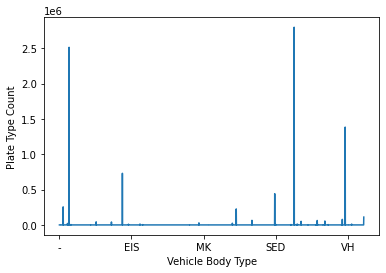

CPU times: user 178 ms, sys: 11.6 ms, total: 189 ms
Wall time: 14.6 s


In [ ]:
%%time
lineplot(dfs, 'Vehicle Body Type', 'Plate Type', measure='count')

In [ ]:
def barplot(dfs, col, lim=10, yname=None):
    
    '''
    This function makes a bar plot for the Spark dataframe df 
    for categorical column col only selecting top categories 
    as specified by lim. 
    '''
    
    # Grouping by the categories, counting on each categories 
    # and ordering them by the count
    classes = dfs.groupBy(col).count().orderBy('count', ascending=False)
    
    # Take first 'lim' number of rows and convert to pandas  
    pd_df = classes.limit(lim).toPandas()
    
    # Making plot 
    pd_df.plot(kind='bar', x=col, legend=False)
    plt.ylabel(yname)
    plt.show()

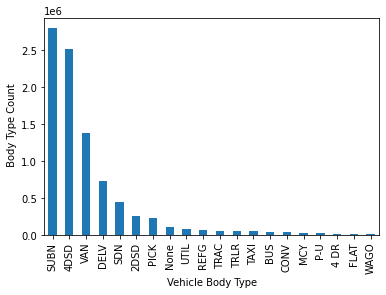

CPU times: user 244 ms, sys: 7.76 ms, total: 252 ms
Wall time: 14.2 s


In [ ]:
%%time
barplot(dfs, 'Vehicle Body Type', lim=20, yname=' Body Type Count')


**Dask**

In [ ]:

import matplotlib.pyplot as plt
import dask.delayed as delayed
from dask.distributed import Client

CPU times: user 54 s, sys: 858 ms, total: 54.8 s
Wall time: 47.6 s


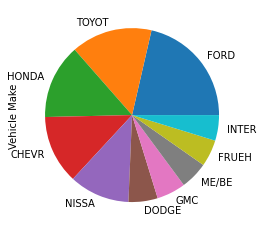

In [ ]:
%%time
# Plot the value counts as a pie chart  
dfdask['Vehicle Make'].value_counts().compute()[:10].plot.pie()

CPU times: user 53.5 s, sys: 930 ms, total: 54.4 s
Wall time: 42.6 s


Text(0, 0.5, 'Count')

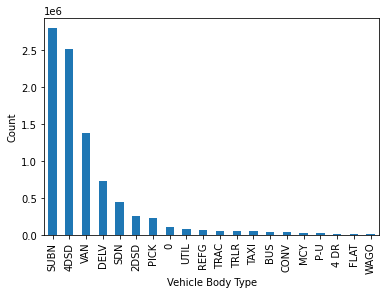

In [ ]:
%%time
# Plot the value counts as a bar chart
dfdask['Vehicle Body Type'].value_counts().compute()[:20].plot.bar()
plt.xlabel("Vehicle Body Type")     
plt.ylabel("Count")

### **Koalas**

In [ ]:
import matplotlib.pyplot as plt
%time dfk['Vehicle Make'].value_counts()[:10].plot.pie()

/usr/local/lib/python3.8/dist-packages/pyspark/sql/dataframe.py:148: UserWarning:

DataFrame.sql_ctx is an internal property, and will be removed in future releases. Use DataFrame.sparkSession instead.

/usr/local/lib/python3.8/dist-packages/pyspark/sql/dataframe.py:127: UserWarning:

DataFrame constructor is internal. Do not directly use it.



CPU times: user 255 ms, sys: 22.7 ms, total: 277 ms
Wall time: 28.2 s


In [ ]:
%time dfk['Vehicle Body Type'].value_counts()[:20].plot.bar()

/usr/local/lib/python3.8/dist-packages/pyspark/sql/dataframe.py:148: UserWarning:

DataFrame.sql_ctx is an internal property, and will be removed in future releases. Use DataFrame.sparkSession instead.

/usr/local/lib/python3.8/dist-packages/pyspark/sql/dataframe.py:127: UserWarning:

DataFrame constructor is internal. Do not directly use it.



CPU times: user 282 ms, sys: 33.1 ms, total: 315 ms
Wall time: 30.1 s




1. Based on the visualization that has been done, we can see that Pyspark has the most short time which is 24.1s. Meanwhile dask and kolas have 47.6s and 28.2s respectively for graph pie chart.
2. Meanwhile for bar chart visualization, Pyspark also again has the most short time wall which is 14.2 s. Then, Koalas comes next which it only took 30.1s and lastly the library that took the longest time is Dask with 42.6s.


# Asking and Answering Questions

### 1. Dask

a. What is the most common plate type?

In [ ]:
%%time
result = dfdask.groupby("Plate Type").agg({"Plate Type" : "count"}).compute()
result.index.name = 'Name'
result.sort_values(by="Plate Type",ascending=False,inplace=True)
result.head(5)

CPU times: user 52.4 s, sys: 918 ms, total: 53.4 s
Wall time: 42.4 s


,Plate Type
Name,
PAS,6511094
COM,1887869
OMT,235273
SRF,96764
OMS,75041


b. What registeration stae has the highest rate?

In [ ]:
%%time
result = dfdask.groupby("Registration State").agg({"Registration State" : "count"}).compute()
result.index.name = 'Name'
result.sort_values(by="Registration State",ascending=False,inplace=True)
result.head(5)

CPU times: user 52.6 s, sys: 886 ms, total: 53.5 s
Wall time: 41.8 s


,Registration State
Name,
NY,7029804
NJ,878677
PA,225760
CT,136973
FL,111887


c. What is the most common vehicle body type?

In [ ]:
%%time
result = dfdask.groupby("Vehicle Body Type").agg({"Vehicle Body Type" : "count"}).compute()
result.index.name = 'Body Type'
result.sort_values(by="Vehicle Body Type",ascending=False,inplace=True)
result.head(5)

CPU times: user 52.9 s, sys: 888 ms, total: 53.8 s
Wall time: 42.3 s


,Vehicle Body Type
Body Type,
SUBN,2797693
4DSD,2513584
VAN,1384393
DELV,730526
SDN,441801


d. What is the most common vehicle colour?

In [ ]:
%%time
result = dfdask.groupby("Vehicle Color").agg({"Vehicle Color" : "count"}).compute()
result.index.name = 'Color'
result.sort_values(by="Vehicle Color",ascending=False,inplace=True)
result.head(5)

CPU times: user 52.3 s, sys: 831 ms, total: 53.2 s
Wall time: 41.6 s


,Vehicle Color
Color,
WHITE,1349234
GY,1214514
WH,1192996
BK,941231
BLACK,665519


e. Which year has the most issue?

CPU times: user 52.2 s, sys: 904 ms, total: 53.1 s
Wall time: 41.9 s


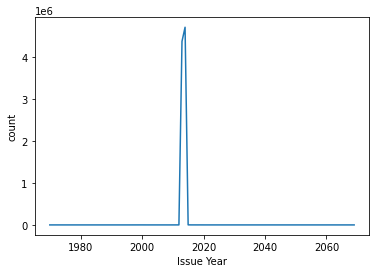

In [ ]:
%%time
import seaborn as sns

dfdask['Issue Year'] = dfdask['Issue Date'].dt.year
result = dfdask.groupby(['Issue Year']).agg({"Issue Year" : "count"}).compute()
result = result.rename(columns={"Issue Year" : "count"})
result = result.reset_index()

sns.lineplot(data=result, x='Issue Year', y='count')

In [ ]:
result.sort_values(by="count", ascending=False).head(5)

,Issue Year,count
16,2014,4716512
15,2013,4379109
17,2015,1522
14,2012,618
21,2019,329


### 2. PySpark

a. What is the most common plate type?

In [ ]:
%%time
result2 = dfs.groupBy("Plate Type").count()
result2.sort(col('count').desc()).show()

+----------+-------+
|Plate Type|  count|
+----------+-------+
|       PAS|6511094|
|       COM|1887869|
|       OMT| 235273|
|       SRF|  96764|
|       OMS|  75041|
|       999|  64534|
|       IRP|  59971|
|       MOT|  23508|
|       TRC|  22458|
|       OMR|  17141|
|       CMB|  13116|
|       ORG|  12735|
|       MED|  12382|
|       OML|  10563|
|       SPO|   7050|
|       DLR|   5132|
|       RGL|   4285|
|       TOW|   4233|
|       SRN|   4082|
|       PSD|   3617|
+----------+-------+
only showing top 20 rows

CPU times: user 87.8 ms, sys: 7.34 ms, total: 95.2 ms
Wall time: 15.3 s


b. What registeration state has the highest rate?

In [ ]:
%%time
result2 = dfs.groupBy("Registration State").count()
result2.sort(col('count').desc()).show()

+------------------+-------+
|Registration State|  count|
+------------------+-------+
|                NY|7029804|
|                NJ| 878677|
|                PA| 225760|
|                CT| 136973|
|                FL| 111887|
|                MA|  78650|
|                VA|  60951|
|                MD|  50407|
|                IN|  49126|
|                NC|  47117|
|                99|  38080|
|                IL|  31763|
|                GA|  30837|
|                AZ|  24245|
|                TX|  24092|
|                OH|  21995|
|                CA|  20100|
|                OK|  19688|
|                SC|  19529|
|                ME|  19459|
+------------------+-------+
only showing top 20 rows

CPU times: user 73 ms, sys: 7.27 ms, total: 80.3 ms
Wall time: 13.6 s


c. What is the most common vehicle body type?

In [ ]:
%%time
result2 = dfs.groupBy("Vehicle Body Type").count()
result2.sort(col('count').desc()).show()

+-----------------+-------+
|Vehicle Body Type|  count|
+-----------------+-------+
|             SUBN|2797693|
|             4DSD|2513584|
|              VAN|1384393|
|             DELV| 730526|
|              SDN| 441801|
|             2DSD| 255204|
|             PICK| 226120|
|             null| 110868|
|             UTIL|  78454|
|             REFG|  64904|
|             TRAC|  62699|
|             TRLR|  55643|
|             TAXI|  50946|
|              BUS|  43382|
|             CONV|  41714|
|              MCY|  28976|
|              P-U|  24036|
|             4 DR|  20630|
|             FLAT|  12894|
|             WAGO|  11936|
+-----------------+-------+
only showing top 20 rows

CPU times: user 76.2 ms, sys: 10.4 ms, total: 86.6 ms
Wall time: 14 s


d. What is the most common vehicle colour?

In [ ]:
%%time
result2 = dfs.groupBy("Vehicle Color").count()
result2.sort(col('count').desc()).show()

+-------------+-------+
|Vehicle Color|  count|
+-------------+-------+
|        WHITE|1349234|
|           GY|1214514|
|           WH|1192996|
|           BK| 941231|
|        BLACK| 665519|
|           BL| 442464|
|         GREY| 417286|
|        SILVE| 313929|
|         BLUE| 301353|
|           RD| 272836|
|        BROWN| 271122|
|          RED| 265215|
|           GR| 201825|
|        GREEN| 151007|
|           TN| 132612|
|        OTHER|  91436|
|         null|  72442|
|           BR|  71921|
|          TAN|  70600|
|           YW|  70001|
+-------------+-------+
only showing top 20 rows

CPU times: user 70.4 ms, sys: 14.3 ms, total: 84.6 ms
Wall time: 13.7 s


e. Which year has the most issue?






In [ ]:
%%time
dfs = dfs.withColumn('Year',dfs['Issue Date'].alias('YEAR'))
result2 = dfs.groupBy("Year").count()
result2.sort(col('count').desc()).show()

+----------+-------+
|      Year|  count|
+----------+-------+
|      null|5476665|
|2013-03-10|  41359|
|2013-08-10|  41104|
|2013-01-10|  40664|
|2014-06-03|  40640|
|2014-06-05|  40276|
|2014-09-01|  39989|
|2014-04-03|  39879|
|2014-01-05|  39289|
|2014-07-03|  38806|
|2013-04-10|  38707|
|2014-02-05|  38490|
|2013-08-11|  38486|
|2014-01-04|  38047|
|2014-10-04|  38020|
|2014-10-06|  38019|
|2014-02-06|  37989|
|2013-10-10|  37819|
|2014-06-06|  37738|
|2014-03-04|  37548|
+----------+-------+
only showing top 20 rows

CPU times: user 410 ms, sys: 63.4 ms, total: 474 ms
Wall time: 1min 20s


### 3. Koalas

a. What is the most common plate type?

In [ ]:
%%time
result3 = dfk.groupby('Plate Type').agg({'Plate Type' : 'count'})
result3.sort_values(by='Plate Type', ascending=False).head(5)

CPU times: user 44.5 ms, sys: 8.16 ms, total: 52.6 ms
Wall time: 319 ms


,Plate Type
Plate Type,
PAS,6511094
COM,1887869
OMT,235273
SRF,96764
OMS,75041


b. What registeration state has the highest rate?

In [ ]:
%%time
result3 = dfk.groupby('Registration State').agg({'Registration State' : 'count'})
result3.sort_values(by='Registration State', ascending=False).head(5)

CPU times: user 45.5 ms, sys: 1.07 ms, total: 46.6 ms
Wall time: 317 ms


,Registration State
Registration State,
NY,7029804
NJ,878677
PA,225760
CT,136973
FL,111887


c. What is the most common vehicle body type?

In [ ]:
%%time
result3 = dfk.groupby('Vehicle Body Type').agg({'Vehicle Body Type' : 'count'})
result3.sort_values(by='Vehicle Body Type', ascending=False).head(5)

CPU times: user 53 ms, sys: 8.03 ms, total: 61 ms
Wall time: 322 ms


,Vehicle Body Type
Vehicle Body Type,
SUBN,2797693
4DSD,2513584
VAN,1384393
DELV,730526
SDN,441801


d. What is the most common vehicle colour?

In [ ]:
%%time
result3 = dfk.groupby('Vehicle Color').agg({'Vehicle Color' : 'count'})
result3.sort_values(by='Vehicle Color', ascending=False).head(5)

CPU times: user 44.8 ms, sys: 5.27 ms, total: 50 ms
Wall time: 262 ms


,Vehicle Color
Vehicle Color,
WHITE,1349234
GY,1214514
WH,1192996
BK,941231
BLACK,665519


e. Which year has the most issue?

In [ ]:
%%time
dfk['Year'] = dfk['Issue Date'].dt.year
result3 = dfk.groupby('Year').agg({'Year' : 'count'})
result3.sort_values(by='Year', ascending=False).head(5)

CPU times: user 117 ms, sys: 20.6 ms, total: 138 ms
Wall time: 773 ms


,Year
Year,
2014,4716512
2013,4379109
2015,1522
2012,618
2019,329


# Findings and Analysis
We will compare the performance between 3 Libraries

### Data Preparation and Cleaning Performace

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
test1 = ['Read Dataset', 'Size Checking', 'Dealing with Null Value', 'Data Tansformation', 'Drop Duplicates']
result1 = pd.DataFrame({'Dask': [1330, 6.11, 53200, 23.3, 1600], 
                        'Pyspark': [53200, 4580, 332000, 23.3, 189], 
                        'Koalas' : [58400, 6900, 48500, 871, 1440]}, 
                        index = test1)
result1

,Dask,Pyspark,Koalas
Read Dataset,1330.00,53200.0,58400
Size Checking,6.11,4580.0,6900
Dealing with Null Value,53200.00,332000.0,48500
Data Tansformation,23.30,23.3,871
Drop Duplicates,1600.00,189.0,1440


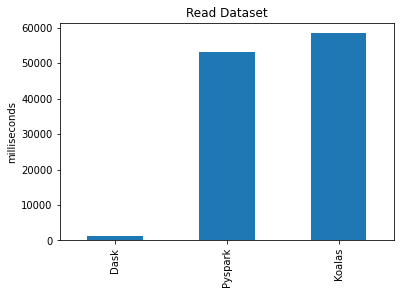

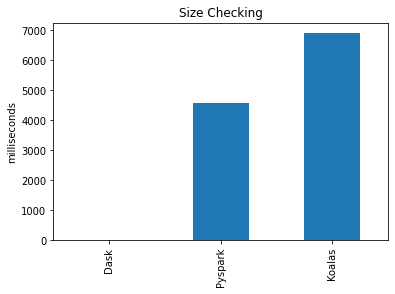

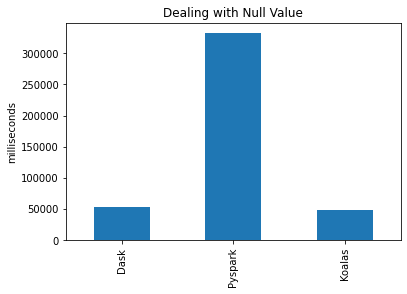

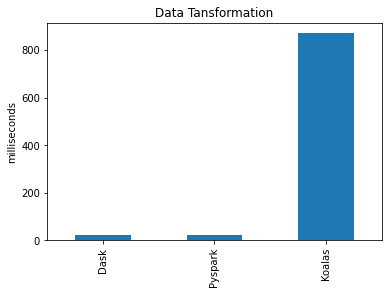

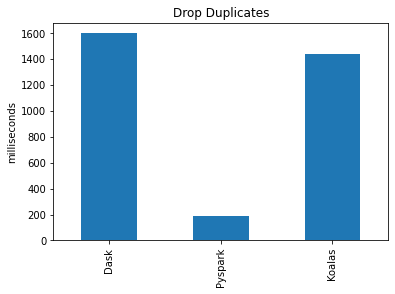

In [ ]:
for test in result1.index:
  result1.loc[test].plot(kind='bar', title=test)
  plt.ylabel("milliseconds")
  plt.show()

### Data Visualization Performace

In [ ]:
test2 = ['Pie Chart', 'Bar Plot']
result2 = pd.DataFrame({'Dask': [47.6, 42.6], 
                        'Pyspark': [24.1, 14.2], 
                        'Koalas' : [28.2, 30.1]}, 
                        index = test2)
result2

,Dask,Pyspark,Koalas
Pie Chart,47.6,24.1,28.2
Bar Plot,42.6,14.2,30.1


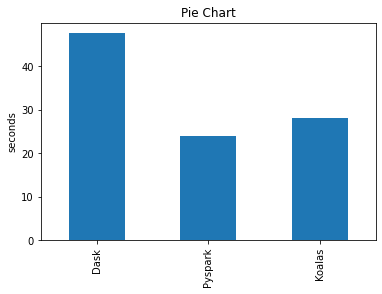

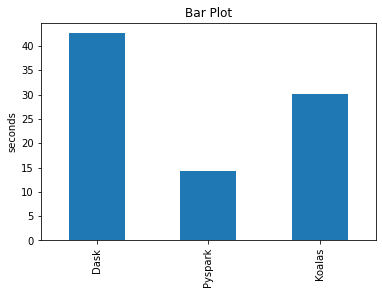

In [ ]:
for test in result2.index:
  result2.loc[test].plot(kind='bar', title=test)
  plt.ylabel("seconds")
  plt.show()

### QnA Performance

In [ ]:
test3 = ['Question 1', 'Question 2', 'Question 3', 'Question 4', 'Question 5']
result3 = pd.DataFrame({'Dask': [42.4, 41.8, 42.3, 41.6, 41.9], 
                        'Pyspark': [15.3, 13.6, 14, 13.7, 80], 
                        'Koalas' : [0.319, 0.317, 0.322, 0.262, 0.733]}, 
                        index = test3)
result3

,Dask,Pyspark,Koalas
Question 1,42.4,15.3,0.319
Question 2,41.8,13.6,0.317
Question 3,42.3,14.0,0.322
Question 4,41.6,13.7,0.262
Question 5,41.9,80.0,0.733


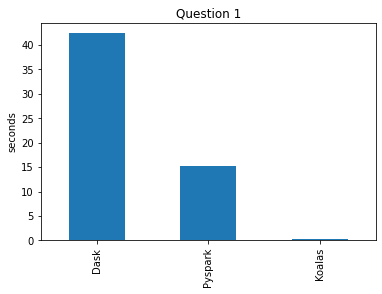

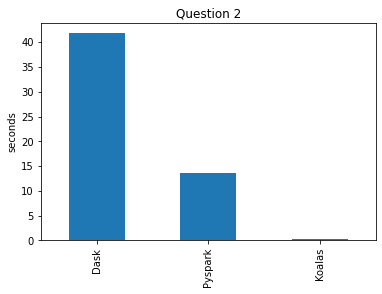

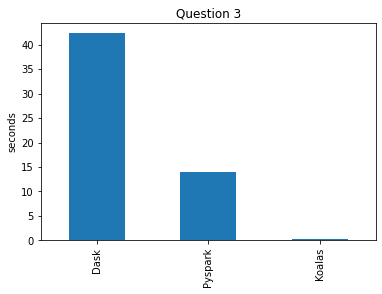

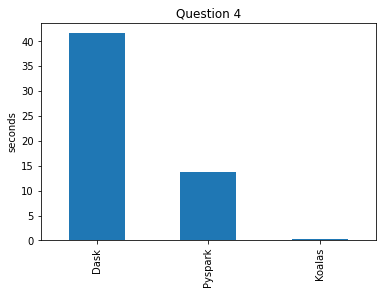

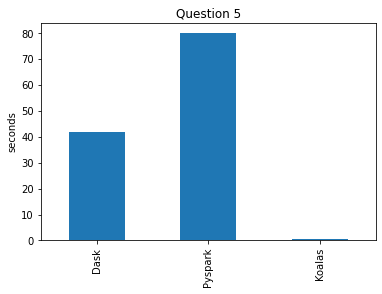

In [ ]:
for test in result3.index:
  result3.loc[test].plot(kind='bar', title=test)
  plt.ylabel("seconds")
  plt.show()

# Inferences and Conclusion


&ensp;After conducting Exploratory Data Analysis (EDA) on the NYC parking ticket dataset using Dask, PySpark, and Koalas, it is clear that each library has its own strengths and weaknesses. Dask is a powerful library for parallel processing and is well-suited for large datasets, but it can be challenging to set up and can be less intuitive than other libraries. PySpark is widely used in the big data community and is known for its scalability and ability to handle large datasets, but it can be challenging to use and has a steep learning curve. Koalas, on the other hand, provides a familiar interface to users who are familiar with Pandas, and is relatively easy to use, but its performance may not be as robust as other libraries for larger datasets.

> **Data Preparation and Cleaning - DASKS**

&ensp;Based on the results of our EDA, we found that **Dask** was the fastest library for data preparation and cleaning. Dask is a parallel computing library that can handle these data preparation and cleaning tasks efficiently. Dask can break down large datasets into smaller chunks and perform operations in parallel, using multiple cores or nodes, reducing the processing time.  

> **Data Visualization - PySpark**

&ensp;As for Data Visualization, PySpark was the fastest library. PySpark provides a unified interface to process data stored in Apache Hadoop and Apache Spark, which makes it a good choice for working with large datasets stored in a Hadoop cluster. Additionally, PySpark integrates well with other big data processing tools, such as Apache Hive, Apache Impala, and Apache Arrow, which can make it easier to perform data visualization and analysis using PySpark.

> **Data Aggregation - Koalas**

&ensp;As data aggregation is mostly used during the QnA, We would recommend Koalas to perform data aggregation as it was the fastest library. Koalas is built on top of Apache Spark, a distributed computing framework designed for big data processing. Apache Spark provides efficient data aggregation and sorting capabilities, leveraging its distributed architecture to process large amounts of data in parallel. 

&ensp;In conclusion, each library has its own strengths and weaknesses, and the best library to use will depend on the specific needs of your project and the size and complexity of your dataset. If you are working with large datasets and require parallel processing, Dask may be the best choice, but if you are looking for a more intuitive and user-friendly library, Koalas may be a better option. On the other hand, if you are working in a big data environment and require scalability and compatibility with other big data tools, PySpark may be the best choice.

# References and Future Work


**References**:

1. "Dask: Parallel Computation with Task Scheduling" (https://dask.org/)
2. "Apache Spark - Lightning-Fast Cluster Computing" (https://spark.apache.org/)
3. "Koalas: pandas API on Apache Spark" (https://koalas.readthedocs.io/en/latest/)

**Future Work**

1. Evaluate the performance of the libraries for even larger datasets and with more complex operations to better understand their scalability and limitations.
2. Compare the libraries on other aspects such as ease of use, community support, and compatibility with other big data tools and systems.
3. Extend the analysis to include other libraries such as Pandas, Vaex, and Modin to see how they compare to the three libraries evaluated in this project.
4. Apply machine learning algorithms to the dataset to see how the libraries handle modeling and prediction tasks.
5. Investigate the possibility of integrating the libraries to leverage their strengths and overcome their limitations.

&ensp;This project is just a starting point for evaluating the different big data processing libraries. There is much more that can be done to understand the strengths and limitations of each library and to determine the best fit for different big data processing needs.